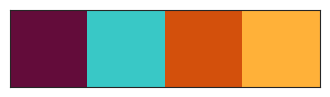

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np, pandas as pd
import os
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
#Import my spotify data
songs = pd.read_csv("dataset.csv")
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
songs.shape

In [30]:

songs = songs.drop(['energy','valence','tempo','time_signature','key','popularity','instrumentalness'],axis=1)
songs.head()

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,loudness,mode,speechiness,acousticness,liveness,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666,False,0.676,-6.746,0,0.1430,0.0322,0.3580,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,False,0.420,-17.235,1,0.0763,0.9240,0.1010,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,False,0.438,-9.734,1,0.0557,0.2100,0.1170,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,False,0.266,-18.515,1,0.0363,0.9050,0.1320,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853,False,0.618,-9.681,1,0.0526,0.4690,0.0829,acoustic


In [31]:
# to describe numerical features we can use describe()
songs.describe()

,Unnamed: 0,duration_ms,danceability,loudness,mode,speechiness,acousticness,liveness
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,2.280292e+05,0.566800,-8.258960,0.637553,0.084652,0.314910,0.213553
std,32909.109681,1.072977e+05,0.173542,5.029337,0.480709,0.105732,0.332523,0.190378
min,0.000000,0.000000e+00,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,1.740660e+05,0.456000,-10.013000,0.000000,0.035900,0.016900,0.098000
50%,56999.500000,2.129060e+05,0.580000,-7.004000,1.000000,0.048900,0.169000,0.132000
75%,85499.250000,2.615060e+05,0.695000,-5.003000,1.000000,0.084500,0.598000,0.273000
max,113999.000000,5.237295e+06,0.985000,4.532000,1.000000,0.965000,0.996000,1.000000


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'liveness'}>, <Axes: >]], dtype=object)

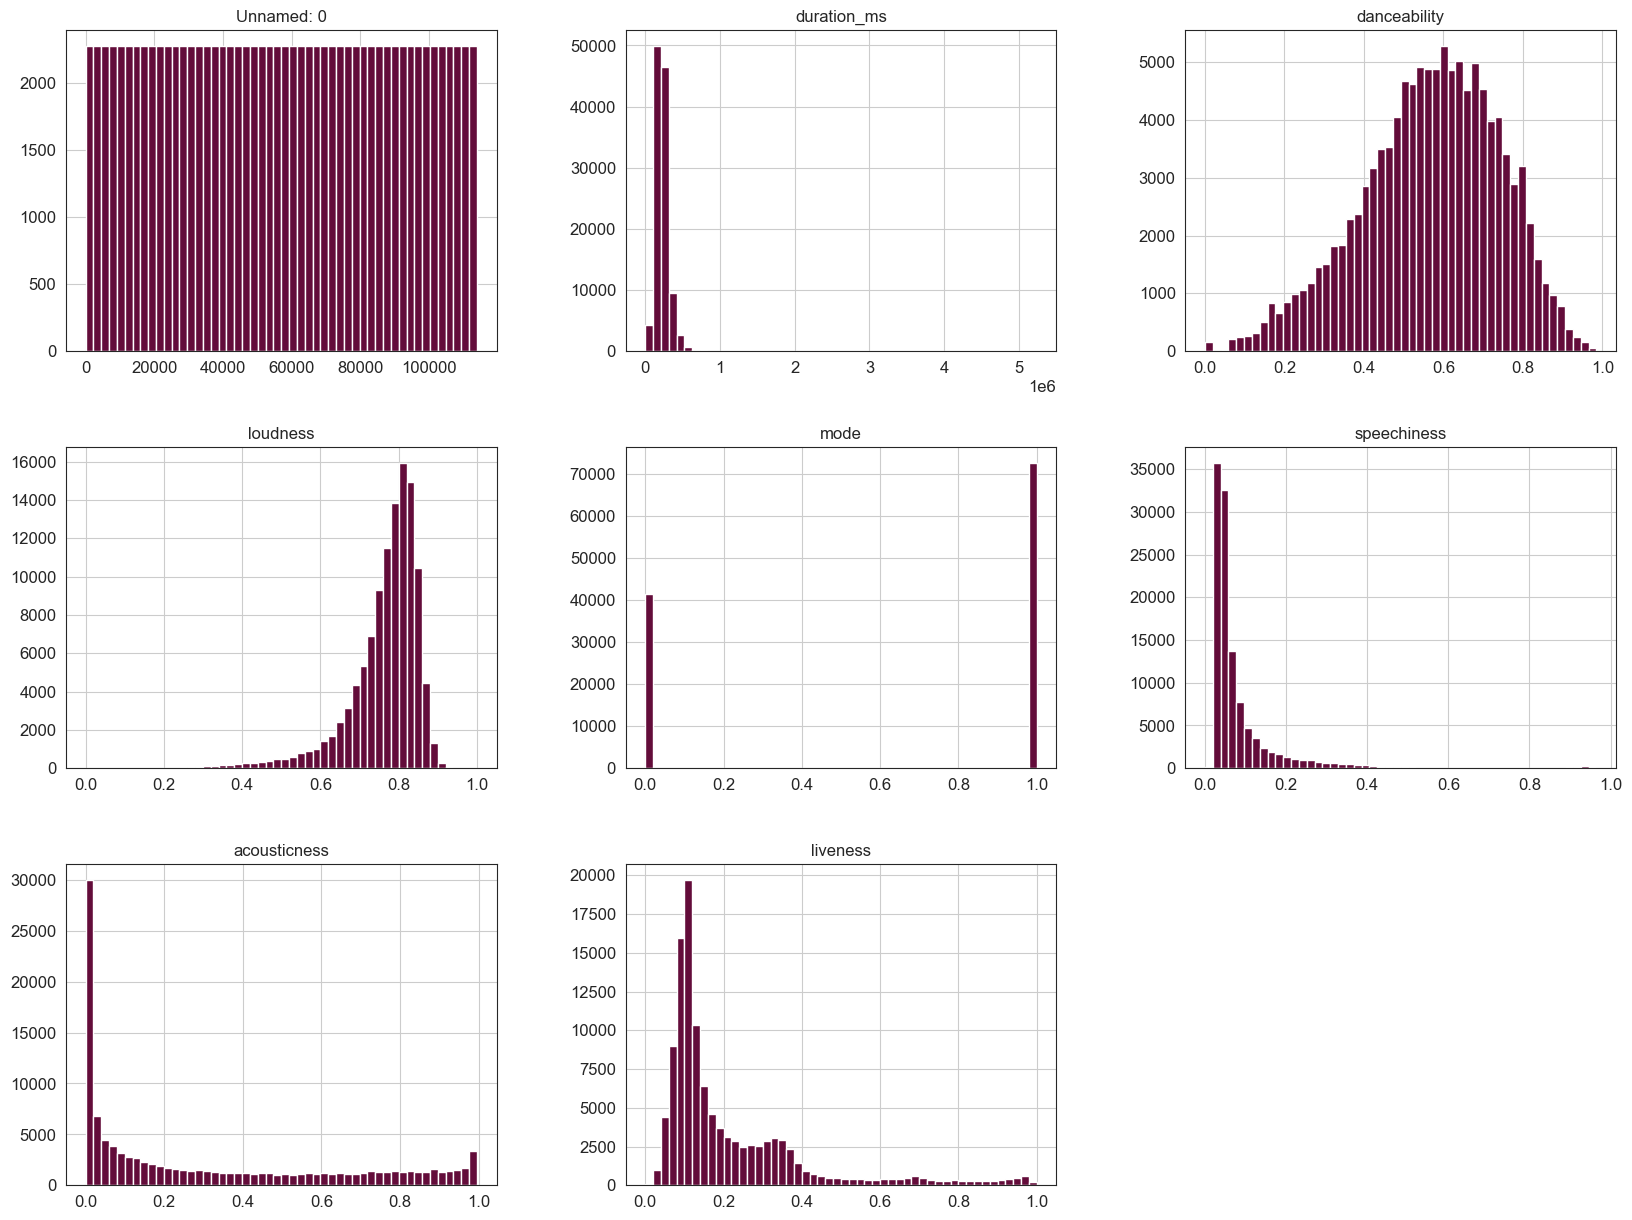

In [32]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

songs.hist(bins=50,figsize=(20,15))

Most features are skewed to the left or the right


In [33]:
# from pandas.plotting import scatter_matrix
# # attributes should contain the features we want to compare
# attr = ['danceability','energy','loudness','speechiness','acousticness','tempo','liveness','valence']

# scatter_matrix(songs[attr],figsize=(12,8))

In [35]:
print(songs.columns.tolist())


['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'duration_ms', 'explicit', 'danceability', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'track_genre']


In [36]:
# remove song names, artist and id before clustering
songs_features = songs.copy()
songs_features = songs_features.drop(['track_name','artists','track_id'],axis=1)
songs_features.head()


,Unnamed: 0,album_name,duration_ms,explicit,danceability,loudness,mode,speechiness,acousticness,liveness,track_genre
0,0,Comedy,230666,False,0.676,0.791392,0,0.1430,0.0322,0.3580,acoustic
1,1,Ghost (Acoustic),149610,False,0.420,0.597377,1,0.0763,0.9240,0.1010,acoustic
2,2,To Begin Again,210826,False,0.438,0.736123,1,0.0557,0.2100,0.1170,acoustic
3,3,Crazy Rich Asians (Original Motion Picture Sou...,201933,False,0.266,0.573701,1,0.0363,0.9050,0.1320,acoustic
4,4,Hold On,198853,False,0.618,0.737103,1,0.0526,0.4690,0.0829,acoustic


In [42]:
# Drop non-numeric columns
songs_features = songs_features.select_dtypes(include=['number'])

# Verify the remaining columns
print(songs_features.head())

   Unnamed: 0  duration_ms  danceability  loudness  mode  speechiness  \
0           0       230666         0.676  0.791392     0       0.1430   
1           1       149610         0.420  0.597377     1       0.0763   
2           2       210826         0.438  0.736123     1       0.0557   
3           3       201933         0.266  0.573701     1       0.0363   
4           4       198853         0.618  0.737103     1       0.0526   

   acousticness  liveness  
0        0.0322    0.3580  
1        0.9240    0.1010  
2        0.2100    0.1170  
3        0.9050    0.1320  
4        0.4690    0.0829  


In [43]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

In [44]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, silhouette score is 0.5408838197384902)


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3, silhouette score is 0.5199560462062847)


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4, silhouette score is 0.38890213387281225)


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5, silhouette score is 0.3588995697488228)


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6, silhouette score is 0.32898378271616746)


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7, silhouette score is 0.35527402262153884)


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8, silhouette score is 0.35309842832890626)


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9, silhouette score is 0.35501889409775933)


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10, silhouette score is 0.3583183557265666)


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 11, silhouette score is 0.3572376003291517)


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 12, silhouette score is 0.35895676809840665)


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 13, silhouette score is 0.3576895306335454)


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 14, silhouette score is 0.3544431686996481)


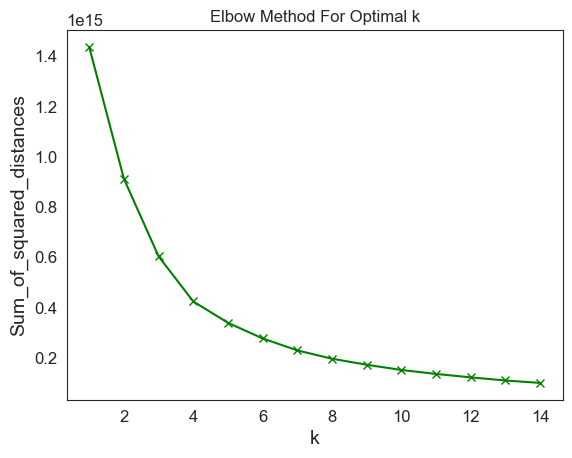

In [45]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [47]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


c:\Users\LAPSHOP\keras_env\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


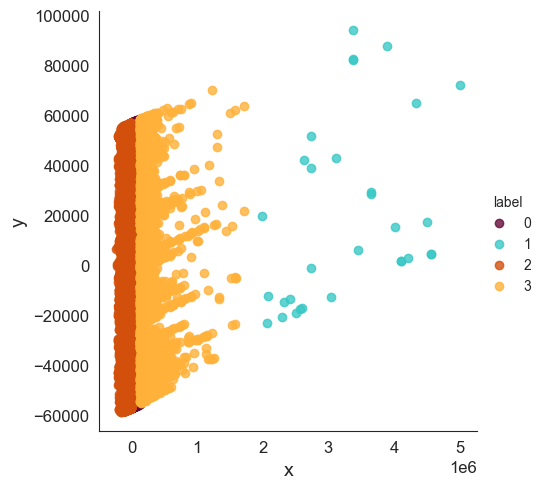

In [48]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [ ]:
#from sklearn.metrics import silhouette_score
#score = silhouette_score(songs_features, y_kmeans, metric='euclidean')
#print(f"Silhouette Score for k=4: {score:.4f}")

NameError: name 'songs_features' is not defined

In [49]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

c:\Users\LAPSHOP\keras_env\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


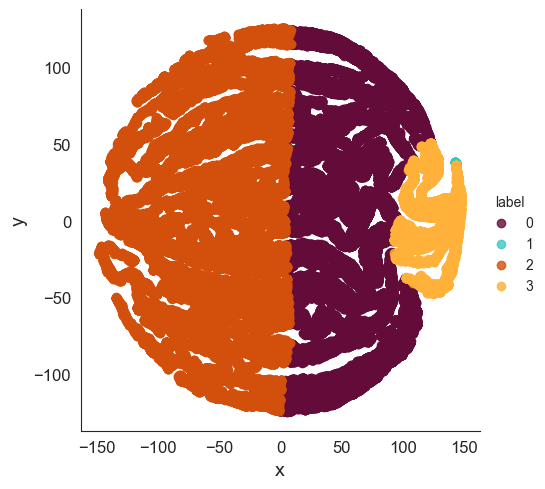

In [50]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [51]:
pca.explained_variance_ratio_

array([0.91412, 0.08588])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. By looking at the explained_variance_ratio_ we can see the 1st component contains 87% and the 2nd 5% which implies we've retained 92% of the original variance in the data which is awesome! 

In [52]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))


      Unnamed: 0  duration_ms  danceability      loudness          mode  \
PC-1   -0.011083     0.999939 -1.187572e-07 -2.927649e-09 -1.593449e-07   
PC-2    0.999939     0.011083  4.172136e-09 -7.763365e-08  5.588844e-08   

       speechiness  acousticness      liveness  
PC-1 -6.139139e-08 -3.224001e-07  1.810704e-08  
PC-2 -2.805226e-07  7.393391e-07  1.969777e-07  


# Next step lets explore each of the 4 clusters and see what songs they contain

In [53]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

label
2    60180
0    46274
3     7515
1       31
Name: count, dtype: int64

In [54]:
songs[songs['label'] == 0].tail(15)

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,loudness,mode,speechiness,acousticness,liveness,track_genre,label
11036,11036,4ZRs2BzVlK54h1GyZO799I,Paolo Nutini,Human - Best Adult Pop Tunes,Numpty,234066,True,0.839,0.749255,1,0.0499,0.727000,0.1100,british,0
4150,4150,1WTlony1MLK4u5OaG8uTLg,Cigarettes After Sex,Apocalypse,Apocalypse,290146,False,0.369,0.748960,1,0.0274,0.020500,0.1090,ambient,0
29669,29669,6v7Q2q1qJnrQLYtq65C4oS,Animadrop,Nobody Like Me,Nobody Like Me,294750,False,0.334,0.823336,0,0.2190,0.049900,0.1310,dubstep,0
110432,110432,53wwYV2Dx9d4mByCvmzbEa,Andrew Bayer,Journey To ABGT500 pt.2,Memories (ABGT499D3),300000,False,0.201,0.792908,0,0.0502,0.001060,0.1810,trance,0
40077,40077,1pgHsf1WqOR7aCiqL3XYO7,Rose Nascimento,Primeiro Passo,No Silêncio,287506,False,0.414,0.844237,1,0.0334,0.644000,0.1070,gospel,0
2837,2837,7jZohYbYAs1Pdl3i2u2c4J,Pato Fu,Televisão de Cachorro,Canção Pra Você Viver Mais,324066,False,0.631,0.797181,1,0.0418,0.031600,0.0946,alt-rock,0
68754,68754,4ZVixZtN0pa9cXednIjrSI,Justin Quiles;Dalex;Konshens,Real,Real,227477,False,0.754,0.830845,1,0.0702,0.068900,0.0949,latino,0
76860,76860,6cy5hG9A8uYZiDeEIILLkB,Nana Mouskouri;Julio Iglesias,Nana Latina,Se Que Volveras,262800,False,0.533,0.744539,1,0.0246,0.601000,0.1170,opera,0
91891,91891,5u4jJAAD6jd0Z741eT7XGP,Volbeat,Twisted Halloween Hits,The Devil's Bleeding Crown,238653,False,0.321,0.830864,1,0.0410,0.000016,0.0442,rock,0
52672,52672,3J8HX3rVxIJyy0SW34he97,George Jones,Alone Again,Diary of My Mind,267466,False,0.546,0.656456,1,0.0284,0.705000,0.0867,honky-tonk,0


In [55]:
songs[songs['label']==1].head(15)

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,loudness,mode,speechiness,acousticness,liveness,track_genre,label
10949,10949,0AfIewt6bapCFSHmVjdQZP,Lady Waks,Bass Shakers 2015,"Bass Shakers 2015 - Continuous DJ Mix, Pt. 1",2796984,False,0.516,0.807058,1,0.0573,0.00336,0.1900,breakbeat,1
13195,13195,3se0UYprtkHthJEBuk1A5K,Mark Farina,Greenhouse Construction,Greenhouse Construction,4334721,False,0.846,0.744890,0,0.0611,0.00371,0.3130,chicago-house,1
21822,21822,6jNCeo2QjxhhcK9luJUrIN,Buju Banton;Garnett Silk;Sanchez;Tony Rebel;Ri...,Reggae Dancehall Riddim: Nanny Goat,Reggae Dancehall Riddim: Nanny Goat,2308806,False,0.857,0.806929,1,0.1590,0.08330,0.0566,dancehall,1
45063,45063,0PINNy1r5eEILOuHpnjl5d,Estas Tonne,Internal Flight (Remastered),Internal Flight (Remastered),3876276,False,0.300,0.744779,0,0.0367,0.94600,0.0783,guitar,1
24348,24348,6wypxnAvmv5zYewUX3VFDd,Seth Troxler,Seth Troxler - The Lab 03,The Lab 03 - Continuous DJ Mix Part 1,4730302,False,0.684,0.709691,0,0.0633,0.01910,0.1030,detroit-techno,1
54755,54755,7FZzHVBVdww1P5ZG3QHM5Q,alva noto;Ryuichi Sakamoto,Glass,Glass,2218626,False,0.199,0.586815,0,0.0384,0.73200,0.1260,idm,1
69935,69935,6i2eqMDQxBNSyRHJD0q0MJ,Immanuel Henry,Hits of Immanuel Henry - Single,Hits Of Immanuel Henry,2851109,False,0.382,0.808668,1,0.0497,0.22000,0.3770,malay,1
73840,73840,6JbQr97EMFD2D3Ek6gxgt1,Loco Dice,Amnesia Ibiza - Underground 10,Amnesia Ibiza Underground 10 DJ Mix,4563897,False,0.783,0.727947,0,0.0612,0.00158,0.1580,minimal-techno,1
10992,10992,6uRhOHCa1APhYNgsvU1EqF,Deekline;Ed Solo,Welcome To The Jungle: The Ultimate Jungle Cak...,Welcome To The Jungle - Continuous DJ Mix Pt. 2,2830628,False,0.579,0.797144,1,0.0464,0.00401,0.1180,breakbeat,1
25798,25798,1PcyypJ70gm6CxTKQvCQiX,Michael Wendler,Der ultimative Wendler Hitmix,Der ultimative Wendler Hitmix XL,2959346,False,0.608,0.840871,1,0.0360,0.05000,0.1390,disco,1


In [56]:
songs[songs['label']==2].head(15)

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,loudness,mode,speechiness,acousticness,liveness,track_genre,label
6748,6748,0cIBOfHKEvwyiAcwlRmylP,Hellripper,Complete and Total Fucking Mayhem,Blood on the Cross,121000,True,0.304,0.789708,0,0.0369,0.000077,0.2290,black-metal,2
107228,107228,4F8xzq2XQ82zMBypnQ3gvB,Icona Pop,Emergency EP,Clap Snap,164399,False,0.897,0.830309,1,0.0571,0.046400,0.0482,synth-pop,2
70517,70517,5cN75zXR3M4si2toC2eF5C,Jacky Cheung,學友.熱,我真的受傷了,208893,False,0.603,0.523648,1,0.0325,0.906000,0.2180,mandopop,2
92371,92371,7uXktLVq43HeS4fPU4nQna,Bobby Rydell,The Best Of Bobby Rydell,Sway,140333,False,0.659,0.816954,0,0.0360,0.603000,0.5590,rockabilly,2
43451,43451,53SnCRcGrB2UCqNGyYZhJD,James Hype;Kelli-Leigh,More Than Friends,More Than Friends,140698,False,0.810,0.831400,0,0.1080,0.101000,0.2680,groove,2
4927,4927,1Q5jFp1g2Ns4gBsHRpcqhu,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,174971,False,0.490,0.657807,1,0.0265,0.607000,0.0859,ambient,2
21569,21569,0af3GhyucTRdd7T7Jmlbbv,Kraff Gad,Charge Up,Charge Up,158475,True,0.792,0.845310,1,0.1640,0.807000,0.0897,dancehall,2
35652,35652,3kbU8YDH7kSlJIUMEFYHMp,Manim Vaqueiro;Raí Saia Rodada,Do Sertão para o Mundo,Festa no Interior,146968,False,0.737,0.865971,1,0.0407,0.300000,0.0664,forro,2
98298,98298,5Xc02eNu16HWnhEsyJKusZ,Heidi Blickenstaff;Susan Blackwell,[title of show] (Soundtrack From The Musical),Secondary Characters,145400,False,0.605,0.782236,1,0.0643,0.801000,0.1540,show-tunes,2
10056,10056,2Pmz8aqad67TXz68XeJChp,Noisia;Skrillex;josh pan;Dylan Brady,Closer,Supersonic (VIP),206010,False,0.416,0.770324,0,0.1000,0.040400,0.1100,breakbeat,2


In [57]:
songs[songs['label']==3].head(15)

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,loudness,mode,speechiness,acousticness,liveness,track_genre,label
54623,54623,0wY9cUFQWQL0V4R3RHXV2w,Lexaunculpt,The Blurring Of Trees,Has Been Trying Not To Wonder,475080,False,0.486,0.702329,0,0.1100,0.665000,0.1600,idm,3
40400,40400,0g4hWb4RzVXxE1EnwgkdrZ,Toque no Altar,10 Anos (Edição Comemorativa),Restitui,436773,False,0.480,0.778240,0,0.0655,0.396000,0.6830,gospel,3
109691,109691,6Mz6XSudSyCsQjIQWXomsa,Cosmonov,Let's Start The Game,The Light,405120,False,0.812,0.793038,0,0.0601,0.002170,0.1980,techno,3
113315,113315,3az1K7WlXr9OLsVUivPlxx,Hillsong Worship,There Is More,Touch Of Heaven (Live Acoustic) - Bonus,377626,False,0.498,0.658602,1,0.0317,0.879000,0.1060,world-music,3
16018,16018,6OG6Ua0DAqKQ4oHC5PQX0n,Wolfgang Amadeus Mozart;Vladimir Horowitz;Orch...,Classical Running,"Piano Concerto No. 23 in A, K.488: III. Allegr...",472333,False,0.349,0.546566,1,0.0347,0.992000,0.1130,classical,3
6110,6110,1XIlhPjBt4udymVWzcPrwm,Deafheaven,Sunbather,Sunbather,616786,False,0.106,0.828737,0,0.0734,0.000003,0.3100,black-metal,3
111811,111811,5d5vSYY4mek3bHv0rwHA5o,Zero 7;José González,The Garden,Crosses,405013,False,0.591,0.724100,1,0.0332,0.050700,0.1290,trip-hop,3
77540,77540,6fbCGwvj2V5JXYFovauhUr,Vou Zuar;Grupo Menos É Mais,Na Mesma Roda (Ao Vivo),Não Deixe o Samba Morrer / Retalhos de Cetim /...,438442,False,0.399,0.714999,0,0.0601,0.616000,0.9070,pagode,3
23797,23797,3atuAh3Kz3idmHgGiGd3H6,Roctonic SA;Home-Mad Djz,Altitude of House Music Vol. 1,Tribute to Chronical Deep - Atmospheric Mix,370260,False,0.636,0.643897,0,0.0382,0.000093,0.0568,deep-house,3
25647,25647,5cinRwHiqT4b1CpOlDdLWx,Todd Terry;DJ Pierre;Vonny;Clyde;Jerry Ropero,Nightlife London (Tech House Couture),Elevator (Lift Me Up) - Jerry Ropero Tech Boom...,403809,False,0.798,0.771470,1,0.0971,0.028500,0.6860,disco,3


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

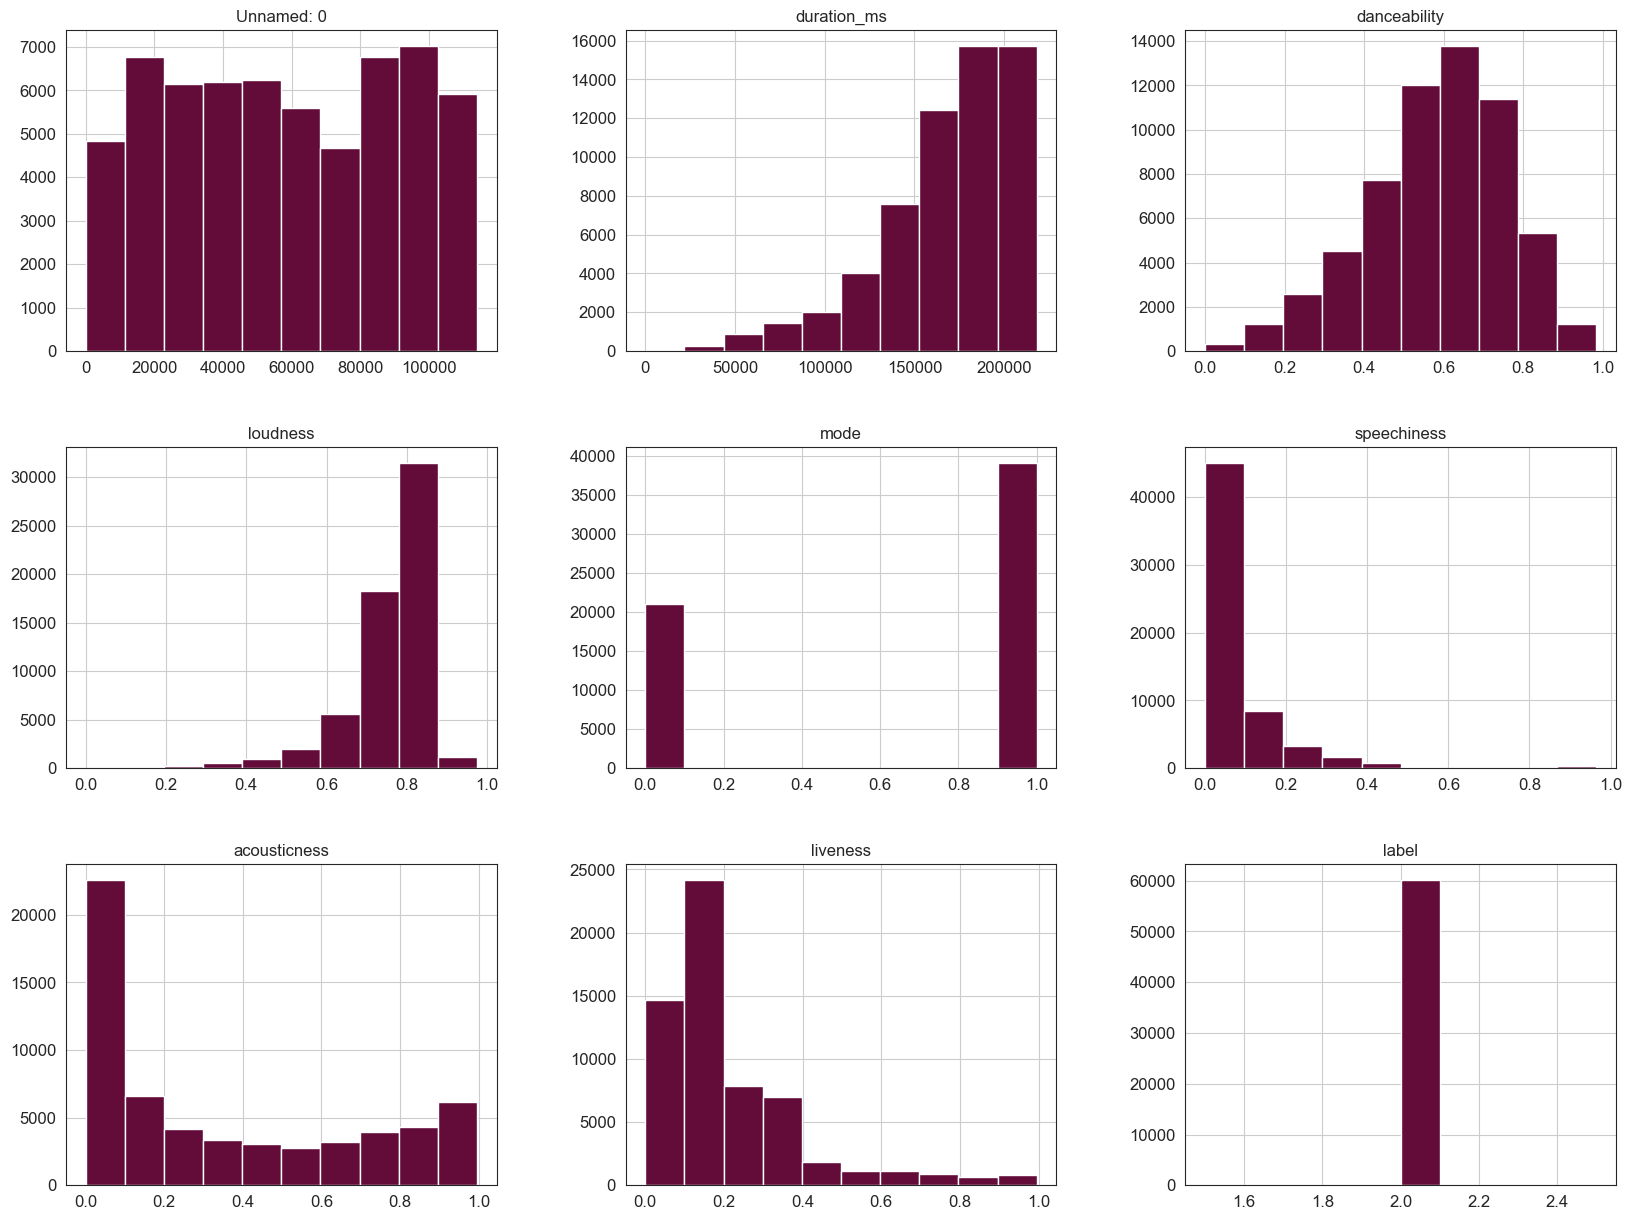

In [58]:
songs[songs['label']==2].hist(figsize=(20,15))

In [62]:
# Select only numeric columns
numeric_columns = songs.select_dtypes(include=['number'])

# Filter rows where 'label' == 3 and calculate the mean
mean_values = numeric_columns[songs['label'] == 3].mean()

# Display the result
print(mean_values)

Unnamed: 0       52741.615835
duration_ms     459317.348370
danceability         0.537563
loudness             0.730131
mode                 0.585363
speechiness          0.079712
acousticness         0.248422
liveness             0.223930
label                3.000000
dtype: float64


In [63]:
#songs[songs['label']==3].mean()

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)
    

In [66]:


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[15232     0    10     2]
 [    0     3     0     3]
 [   22     0 19812     0]
 [    3     0     0  2533]]


<Axes: title={'center': 'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

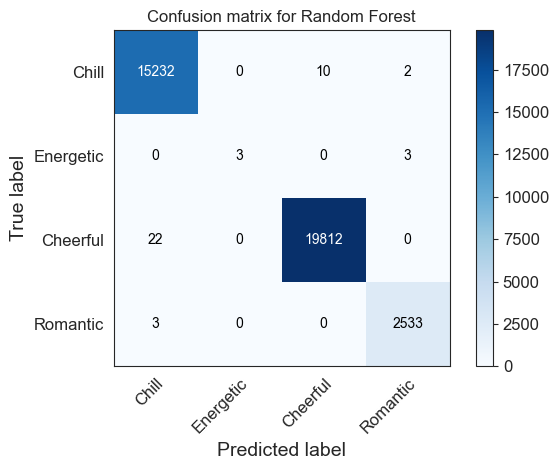

In [67]:
# Confusion matrix
definitions = ['Chill','Energetic','Cheerful','Romantic']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [68]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('Unnamed: 0', 0.015545990763852385),
 ('duration_ms', 0.9315623162081517),
 ('danceability', 0.012136298049709981),
 ('loudness', 0.01106305256945205),
 ('mode', 0.0007416955211284697),
 ('speechiness', 0.0098745131765549),
 ('acousticness', 0.013211354274582844),
 ('liveness', 0.005864779436567722)]

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [70]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[15227     0    10     7]
 [    0     6     0     0]
 [   21     0 19813     0]
 [    4     0     0  2532]]


<Axes: title={'center': 'Confusion matrix for KNN'}, xlabel='Predicted label', ylabel='True label'>

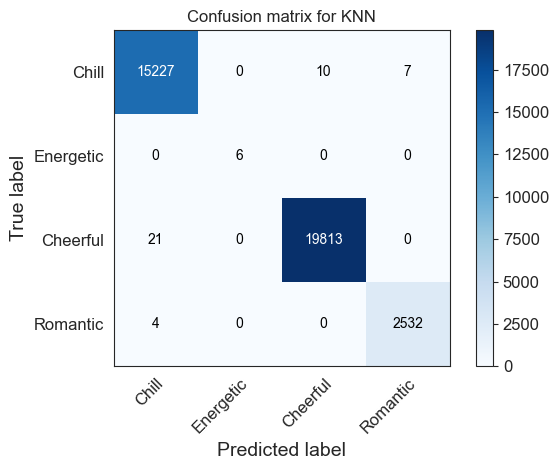

In [71]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [72]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[15242     0     2     0]
 [    0     6     0     0]
 [    0     0 19834     0]
 [    0     0     0  2536]]


<Axes: title={'center': 'Confusion matrix for SVM'}, xlabel='Predicted label', ylabel='True label'>

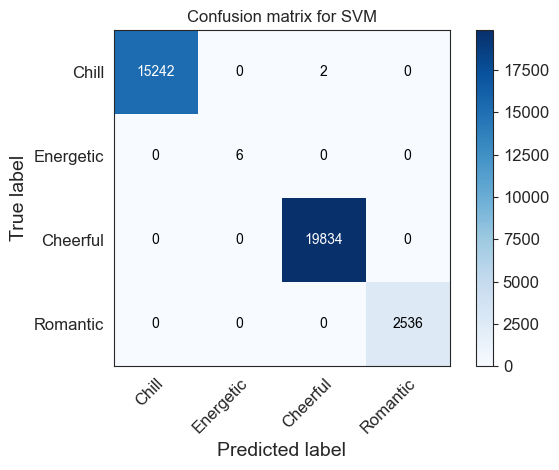

In [73]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [74]:
from sklearn.neural_network import MLPClassifier

In [75]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [76]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[ 4665     0     1 10578]
 [    0     0     0     6]
 [ 6776     0  4984  8074]
 [   15     0     0  2521]]


<Axes: title={'center': 'Confusion matrix for MLP'}, xlabel='Predicted label', ylabel='True label'>

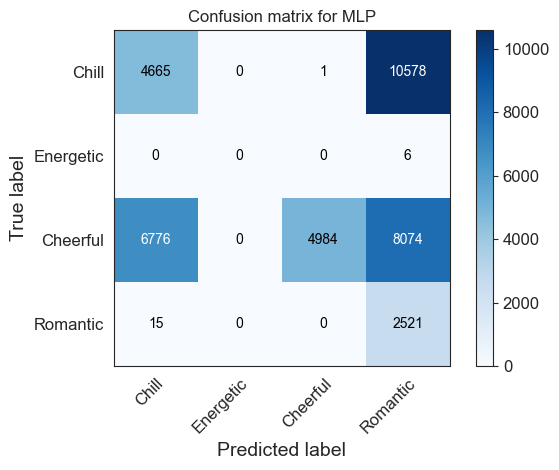

In [77]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [78]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

       Chill       0.41      0.31      0.35     15244
   Energetic       0.00      0.00      0.00         6
    Cheerful       1.00      0.25      0.40     19834
    Romantic       0.12      0.99      0.21      2536

    accuracy                           0.32     37620
   macro avg       0.38      0.39      0.24     37620
weighted avg       0.70      0.32      0.37     37620
MLP


c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LAPSHOP\keras_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

       Chill       1.00      1.00      1.00     15244
   Energetic       1.00      1.00      1.00         6
    Cheerful       1.00      1.00      1.00     19834
    Romantic       1.00      1.00      1.00      2536

    accuracy                           1.00     37620
   macro avg       1.00      1.00      1.00     37620
weighted avg       1.00      1.00      1.00     37620
SVM


In [80]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Chill       1.00      1.00      1.00     15244
   Energetic       1.00      1.00      1.00         6
    Cheerful       1.00      1.00      1.00     19834
    Romantic       1.00      1.00      1.00      2536

    accuracy                           1.00     37620
   macro avg       1.00      1.00      1.00     37620
weighted avg       1.00      1.00      1.00     37620
KNN


In [81]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

       Chill       1.00      1.00      1.00     15244
   Energetic       1.00      0.50      0.67         6
    Cheerful       1.00      1.00      1.00     19834
    Romantic       1.00      1.00      1.00      2536

    accuracy                           1.00     37620
   macro avg       1.00      0.87      0.92     37620
weighted avg       1.00      1.00      1.00     37620
forest


In [82]:
songs['label'] = songs['label'].replace([1],'energetic')
songs['label'] = songs['label'].replace([0],'Chill')
songs['label'] = songs['label'].replace([2],'cheerful')
songs['label'] = songs['label'].replace([3],'romantic')

songs.to_csv("ClassifiedMusicData.csv",index=False)

In [83]:
songs.head()

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,loudness,mode,speechiness,acousticness,liveness,track_genre,label
71398,71398,23bUtNc4PUyHNrYNolzMPq,White Zombie,Spooky Scary Season,"I'm Your Boogieman - From ""The Crow: City Of A...",267573,False,0.645,0.847456,1,0.1110,0.001130,0.2230,metal,Chill
6748,6748,0cIBOfHKEvwyiAcwlRmylP,Hellripper,Complete and Total Fucking Mayhem,Blood on the Cross,121000,True,0.304,0.789708,0,0.0369,0.000077,0.2290,black-metal,cheerful
107228,107228,4F8xzq2XQ82zMBypnQ3gvB,Icona Pop,Emergency EP,Clap Snap,164399,False,0.897,0.830309,1,0.0571,0.046400,0.0482,synth-pop,cheerful
12794,12794,07k1zeZtt3ECnaVV4qiyWc,Alan Tam,飛馬,獨醉街頭,235306,False,0.563,0.742948,1,0.0379,0.706000,0.2270,cantopop,Chill
70517,70517,5cN75zXR3M4si2toC2eF5C,Jacky Cheung,學友.熱,我真的受傷了,208893,False,0.603,0.523648,1,0.0325,0.906000,0.2180,mandopop,cheerful


In [84]:
songs[songs['label']=='romantic'].head(15)

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,loudness,mode,speechiness,acousticness,liveness,track_genre,label
54623,54623,0wY9cUFQWQL0V4R3RHXV2w,Lexaunculpt,The Blurring Of Trees,Has Been Trying Not To Wonder,475080,False,0.486,0.702329,0,0.1100,0.665000,0.1600,idm,romantic
40400,40400,0g4hWb4RzVXxE1EnwgkdrZ,Toque no Altar,10 Anos (Edição Comemorativa),Restitui,436773,False,0.480,0.778240,0,0.0655,0.396000,0.6830,gospel,romantic
109691,109691,6Mz6XSudSyCsQjIQWXomsa,Cosmonov,Let's Start The Game,The Light,405120,False,0.812,0.793038,0,0.0601,0.002170,0.1980,techno,romantic
113315,113315,3az1K7WlXr9OLsVUivPlxx,Hillsong Worship,There Is More,Touch Of Heaven (Live Acoustic) - Bonus,377626,False,0.498,0.658602,1,0.0317,0.879000,0.1060,world-music,romantic
16018,16018,6OG6Ua0DAqKQ4oHC5PQX0n,Wolfgang Amadeus Mozart;Vladimir Horowitz;Orch...,Classical Running,"Piano Concerto No. 23 in A, K.488: III. Allegr...",472333,False,0.349,0.546566,1,0.0347,0.992000,0.1130,classical,romantic
6110,6110,1XIlhPjBt4udymVWzcPrwm,Deafheaven,Sunbather,Sunbather,616786,False,0.106,0.828737,0,0.0734,0.000003,0.3100,black-metal,romantic
111811,111811,5d5vSYY4mek3bHv0rwHA5o,Zero 7;José González,The Garden,Crosses,405013,False,0.591,0.724100,1,0.0332,0.050700,0.1290,trip-hop,romantic
77540,77540,6fbCGwvj2V5JXYFovauhUr,Vou Zuar;Grupo Menos É Mais,Na Mesma Roda (Ao Vivo),Não Deixe o Samba Morrer / Retalhos de Cetim /...,438442,False,0.399,0.714999,0,0.0601,0.616000,0.9070,pagode,romantic
23797,23797,3atuAh3Kz3idmHgGiGd3H6,Roctonic SA;Home-Mad Djz,Altitude of House Music Vol. 1,Tribute to Chronical Deep - Atmospheric Mix,370260,False,0.636,0.643897,0,0.0382,0.000093,0.0568,deep-house,romantic
25647,25647,5cinRwHiqT4b1CpOlDdLWx,Todd Terry;DJ Pierre;Vonny;Clyde;Jerry Ropero,Nightlife London (Tech House Couture),Elevator (Lift Me Up) - Jerry Ropero Tech Boom...,403809,False,0.798,0.771470,1,0.0971,0.028500,0.6860,disco,romantic


In [85]:
# import spotipy

# urn = 'spotify:artist:3jOstUTkEu2JkjvRdBA5Gu'
# sp = spotipy.Spotify()

# artist = sp.artist(urn)
# print(artist)

# user = sp.user('plamere')
# print(user)

In [86]:
cluster_0 = songs[songs['label']=="Chill"]
cluster_1 = songs[songs['label']=="energetic"]
cluster_2 = songs[songs['label']=="cheerful"]
cluster_3 = songs[songs['label']=="romantic"]

cluster_0.to_csv("cluster0.csv",index=False)
cluster_1.to_csv("cluster1.csv",index=False)
cluster_2.to_csv("cluster2.csv",index=False)
cluster_3.to_csv("cluster3.csv",index=False)
